# CSIS 3290 – Course Project: Classification with Custom Dataset
## Name: Jesus Negron



# Part 1: Dataset Selection and Exploration


## Dataset Information

- **Source:** UCI Machine Learning Repository  
- **Link:** https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset  
- **File Name:** Dry_Bean_Dataset.xlsx  
- **Screenshot:** Included in the Dataset folder

### Description:
This dataset contains **13,611 samples** of **seven types of dry beans**. Each sample includes **16 numerical features** extracted from bean images using computer vision techniques.

### Target Variable:
`Class` — the type of bean (SEKER, BARBUNYA, BOMBAY, CALI, HOROZ, SIRA, DERMASON)

### Features:
Includes shape and area-related attributes such as:
- Area
- Perimeter
- Compactness
- Elongation
- Roundness
- Aspect Ratio
- Eccentricity  
*(and others related to geometry and morphology)*

### Imbalance:
Yes — the dataset is **imbalanced**. Some classes (e.g., DERMASON) have many more samples than others (e.g., BOMBAY).

### Reason for Selection:
- It’s a **real-world**, **multi-class** classification problem.
- It’s **not overused** in academic projects.
- Contains **rich numerical features**, allowing for meaningful model training and comparison.


In [1]:
#!pip install seaborn


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Dry_Bean_Dataset.csv")
df.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
print("Columns", df.columns)
print("shape", df.shape)
df.info

Columns Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')
shape (13611, 17)


<bound method DataFrame.info of         Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity 

In [6]:
df.isnull().sum()


Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [7]:
df.duplicated().sum()


68

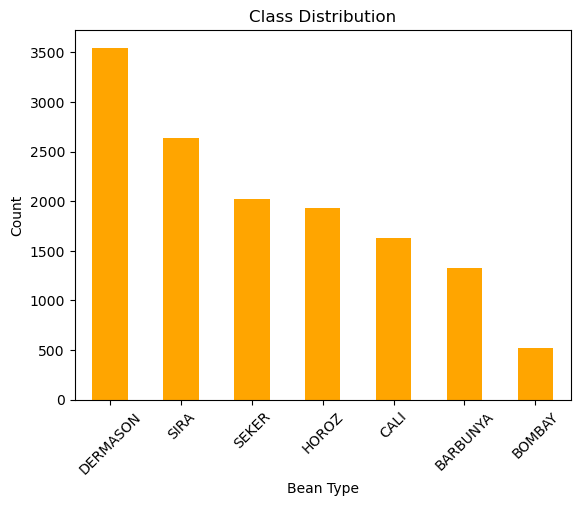

In [8]:
df["Class"].value_counts().plot(kind="bar", color="orange")
plt.title("Class Distribution")
plt.xlabel("Bean Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


The chart shows a clear class imbalance. For example, the 'DERMASON' class appears significantly more than others like 'BOMBAY'. This imbalance can affect the performance of classification models and must be considered during evaluation, especially when using metrics like accuracy, which may be misleading in imbalanced datasets.


# Part 2: Data Preprocessing & Feature Engineering


## Data Cleaning

Initial inspection is performed to detect issues such as missing values, duplicates, or outliers.


In [9]:
df = df.drop_duplicates()


In [10]:
df.shape


(13543, 17)

Before starting our modeling, we checked the shape of the dataset.

It contains **13,543 samples**, where each sample represents a single bean.  
There are **17 columns** in total: **16 numerical features** that describe the bean's physical properties, and **one label column**, which indicates the bean type.

This gives us enough data to train machine learning models with reliable results.

### Data Cleaning Summary

- No missing values were found.
- Duplicate records were detected and removed.
- Dataset shape was updated after removing duplicates to ensure clean training data.


## Feature Engineering

Three new features were engineered based on the existing numerical columns to potentially improve model performance.


In [11]:
df.columns


Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [12]:
df = df.copy()



Let's create new features to enhance model performance:
- **Area_Perimeter_Ratio**: Area divided by Perimeter
- **Shape_Index**: Product of Compactness and Roundness
- **Eccentricity_Sq**: Square of Eccentricity



In [13]:
# Feature 1: Area divided by Perimeter

df['Area_Perimeter_Ratio'] = df['Area'] / df['Perimeter']
df['Shape_Index'] = df['Compactness'] * df['roundness']
df['Eccentricity_Sq'] = df['Eccentricity'] ** 2




These engineered features give the models more useful information to distinguish between bean types.

In [14]:
df[['Area_Perimeter_Ratio', 'Shape_Index', 'Eccentricity_Sq']].head()


,Area_Perimeter_Ratio,Shape_Index,Eccentricity_Sq
0,46.526985,0.875022,0.302293
1,45.036347,0.846107,0.169567
2,47.075035,0.861381,0.316662
3,46.460355,0.839150,0.248618
4,48.602399,0.955838,0.111342


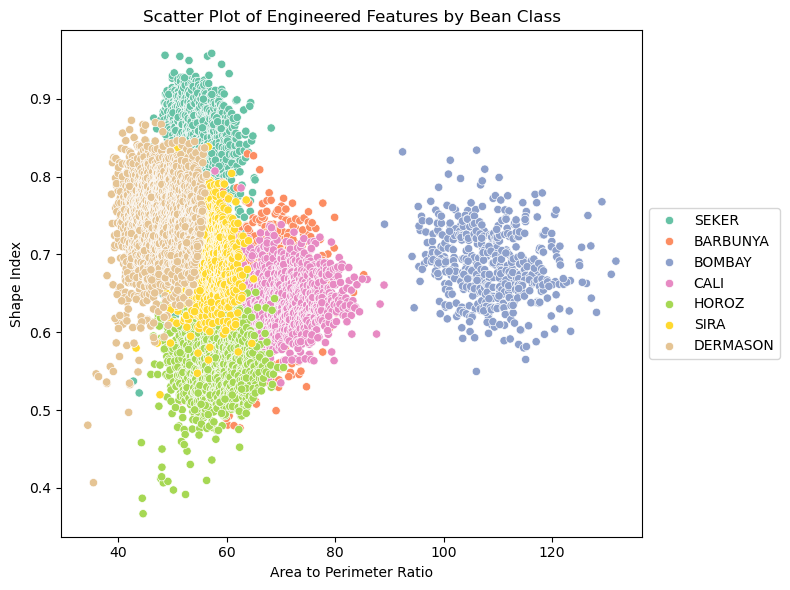

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Area_Perimeter_Ratio', y='Shape_Index', hue='Class', palette='Set2')
plt.title("Scatter Plot of Engineered Features by Bean Class")
plt.xlabel("Area to Perimeter Ratio")
plt.ylabel("Shape Index")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

This scatter plot shows how the new features we created: 'Area to Perimeter Ratio' and 'Shape Index' can help tell the bean types apart.
Each dot is one bean, and the colors show which type it is.
We can see that some types (like BOMBAY) are in their own space, while others are closer together.
This means the new features might be helpful when training our model.

# Part 3: Train Classification Models with Scikit-Learn


## Data Preparation

All features are numeric. The target column `Class` is categorical, so it is label-encoded. The dataset is split into training and testing sets using stratified sampling to preserve class proportions.


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Firstly, we Split features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Secondly, Convert class labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded,test_size=0.2, random_state=42, stratify=y_encoded)


## Model 1: Logistic Regression

Logistic Regression is a linear model suitable for multiclass problems using the `multinomial` option. Regularization (`C`) is set to 1.0.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression


# Train logistic regression model (rename to avoid ambiguity)
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)
lr_model.fit(X_train, y_train)


/opt/anaconda3/envs/jesusrnc/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [18]:
# Generate predictions and predicted probabilities

y_pred_lr  = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)


In [19]:
# Let's calculate accuracy, precision, recall, F1 score, and prints a detailed classification report.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Compute core metrics
accuracy_lr  = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr    = recall_score(y_test, y_pred_lr, average='macro')
f1_lr        = f1_score(y_test, y_pred_lr, average='macro')

print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(classification_report(
    y_test,
    y_pred_lr,
    target_names=label_encoder.classes_
))


Logistic Regression Accuracy: 0.9188
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.89      0.91       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.91      0.94      0.93       326
    DERMASON       0.93      0.91      0.92       709
       HOROZ       0.96      0.94      0.95       372
       SEKER       0.93      0.94      0.94       406
        SIRA       0.86      0.88      0.87       527

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709



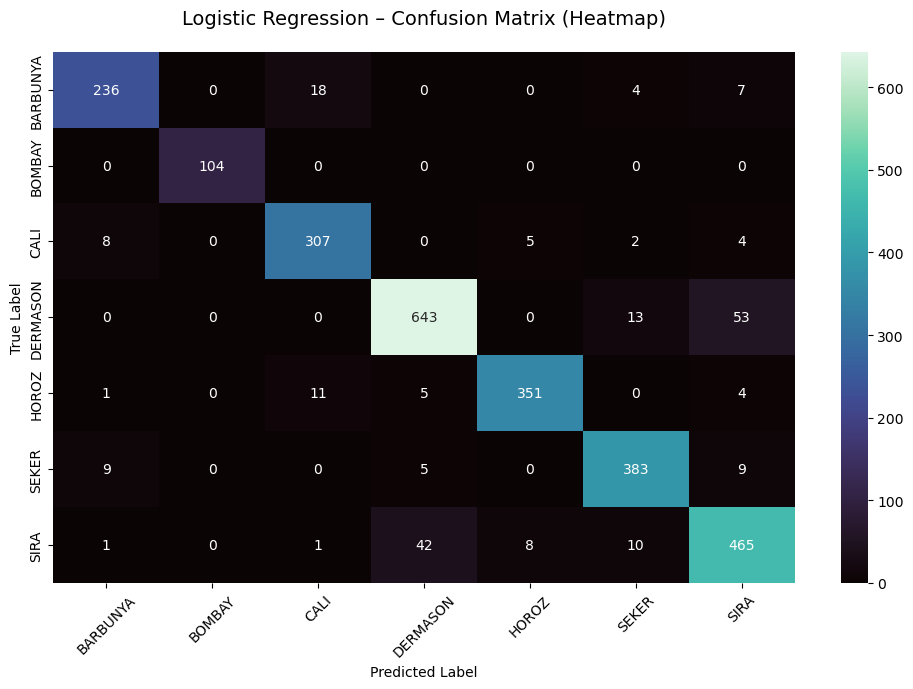

In [20]:
#Displays a heatmap of the confusion matrix for visual analysis.

from sklearn.metrics import confusion_matrix

cm_logreg = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(10, 7))
sns.heatmap(
    cm_logreg,
    annot=True,
    fmt='d',
    cmap='mako',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title("Logistic Regression – Confusion Matrix (Heatmap)", fontsize=14, pad=20)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Confusion Matrix — Logistic Regression  
**What it shows:**  
This heatmap shows the true bean types (rows) versus what the model predicted (columns).

**Key insight:**  
Most predictions are on the diagonal, so the model gets the majority of bean types right. There are small confusions: for example, BARBUNYA is sometimes predicted as CALI, and DERMASON has a few misclassifications with SIRA. These errors are limited, which means the model mostly distinguishes similar shapes well.

**Why it matters:**  
The confusion matrix gives a detailed view of specific mistakes that overall accuracy hides. It tells us which bean types are being confused and helps us target where the model could improve.

**Next step:**  
To reduce remaining confusion, we could normalize the matrix to show percentages, add more discriminative features, or combine this model with a secondary one for ambiguous cases.


<Axes: >

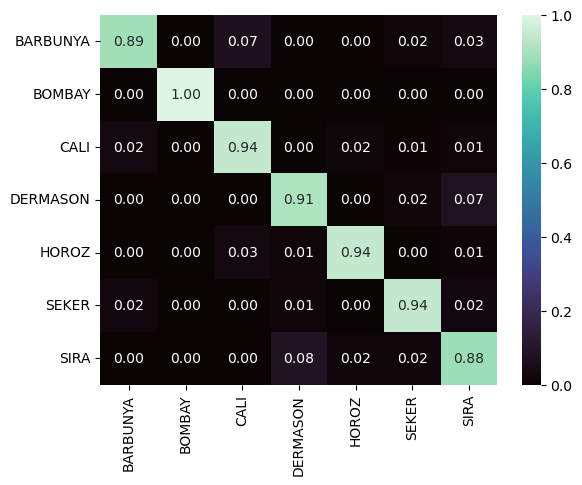

In [21]:
#Normalized the matrix 

cm_norm = cm_logreg.astype("float") / cm_logreg.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="mako", 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)


#### Normalized Confusion Matrix — Logistic Regression  

**Key takeaway:** Most classes are predicted accurately; SIRA shows the most confusion.  

**What it shows:**  
Row-normalized confusion matrix: proportion of correct and incorrect predictions per true class.  

**Key insight:**  
BOMBAY is predicted perfectly; CALI, HOROZ, and SEKER are above 90% correct. SIRA is around 88%, with some confusion involving DERMASON and others.  

**Why it matters:**  
Normalization lets us compare performance fairly across all bean types, including rare ones. It shows accuracy in percentage terms, not just raw counts.  

**Next step:**  
Improve weaker classes like SIRA by adding features or using a secondary check when the model is less confident.


In [22]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize for multiclass ROC AUC
y_test_bin_lr = label_binarize(y_test, classes=np.unique(y_test))
roc_auc_lr = roc_auc_score(
    y_test_bin_lr,
    y_proba_lr,
    multi_class='ovr',
    average='macro'
)
print(f"Logistic Regression ROC AUC Score: {roc_auc_lr:.4f}")


Logistic Regression ROC AUC Score: 0.9947


In [23]:
# Build and format logistic regression metrics table

results_df_lr = pd.DataFrame({
    "Metric": ["Accuracy", "Precision (Macro)", "Recall (Macro)", "F1 Score (Macro)", "ROC AUC (Macro)"],
    "Logistic Regression": [accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr]
})
results_df_lr.set_index("Metric", inplace=True)
results_df_lr = results_df_lr.round(4)
results_df_lr

,Logistic Regression
Metric,
Accuracy,0.9188
Precision (Macro),0.9305
Recall (Macro),0.9298
F1 Score (Macro),0.9300
ROC AUC (Macro),0.9947


## Model 2: Support Vector Machine (SVM)

We train an SVM with RBF kernel to capture non-linear decision boundaries.  
We set `C=1` to balance margin width and classification errors.


In [24]:
from sklearn.svm import SVC


svm_model = SVC(kernel='rbf', C=1, probability=True, random_state=42)
svm_model.fit(X_train, y_train)


SVC(C=1, probability=True, random_state=42)

In [25]:
from sklearn.preprocessing import label_binarize

# Generate predictions and probability estimates
y_pred_svm  = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)

# Binarize true labels for multiclass ROC AUC
y_test_bin_svm = label_binarize(y_test, classes=np.unique(y_test))



In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# Compute and store SVM metrics & Classification report for later comparison
accuracy_svm  = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm    = recall_score(y_test, y_pred_svm, average='macro')
f1_svm        = f1_score(y_test, y_pred_svm, average='macro')
roc_auc_svm   = roc_auc_score(y_test_bin_svm, y_proba_svm, multi_class='ovr', average='macro')

print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM F1 Score (Macro): {f1_svm:.4f}")
print(f"SVM ROC AUC Score: {roc_auc_svm:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

SVM Accuracy: 0.9206
SVM F1 Score (Macro): 0.9325
SVM ROC AUC Score: 0.9945
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.89      0.91       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.92      0.95      0.93       326
    DERMASON       0.92      0.91      0.92       709
       HOROZ       0.96      0.94      0.95       372
       SEKER       0.93      0.95      0.94       406
        SIRA       0.86      0.88      0.87       527

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709



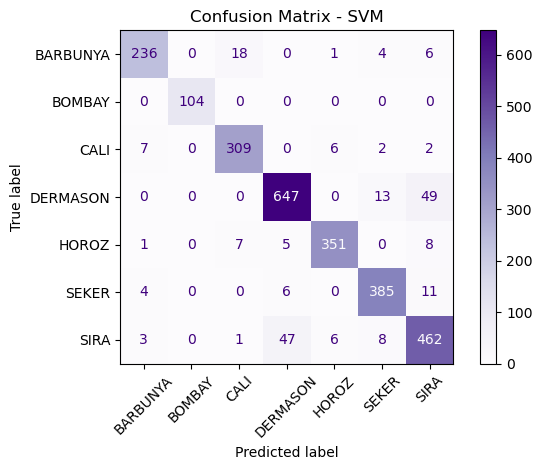

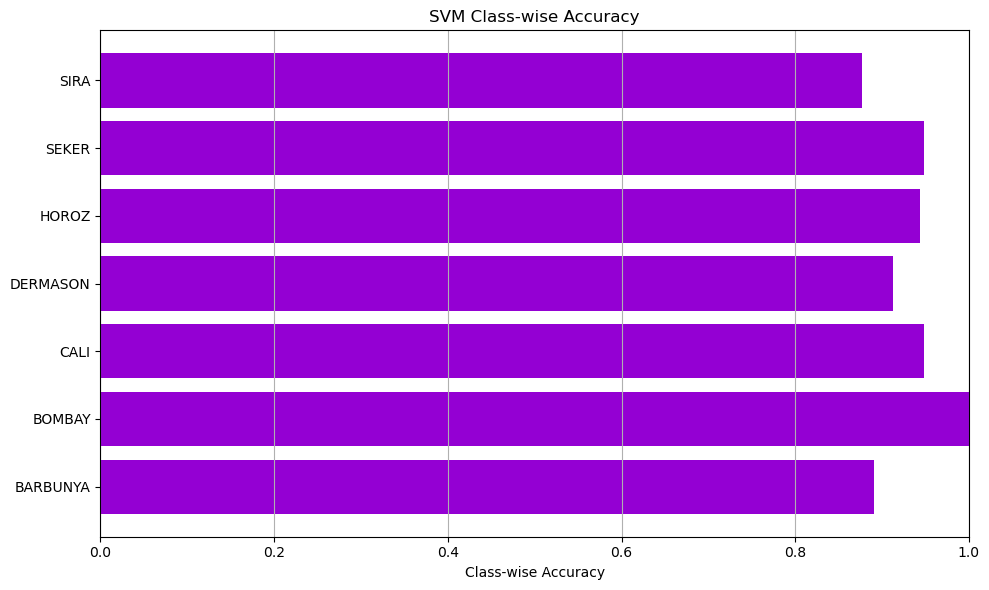

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Let's Plot SVM confusion matrix and per-class accuracy to diagnose errors and compare class performance
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=label_encoder.classes_)
disp.plot(cmap='Purples', xticks_rotation=45)
plt.title("Confusion Matrix - SVM")
plt.tight_layout()
plt.show()

# Class-wise accuracy
class_accuracies = cm_svm.diagonal() / cm_svm.sum(axis=1)
plt.figure(figsize=(10, 6))
plt.barh(label_encoder.classes_, class_accuracies, color='darkviolet')
plt.xlabel("Class-wise Accuracy")
plt.title("SVM Class-wise Accuracy")
plt.xlim(0, 1)
plt.grid(axis='x')
plt.tight_layout()
plt.show()




#### Confusion Matrix and Class-wise Accuracy — SVM

**Key takeaway:**  
BOMBAY and SEKER are the strongest predictions, while SIRA shows the most confusion.

**What it shows:**  
The heatmap is the confusion matrix (true vs predicted labels), and the bar chart shows accuracy per class.

**Key insight:**  
Most predictions are on the diagonal, so the model gets the majority of bean types right. BOMBAY and SEKER have especially high accuracy. CALI also performs very well. DERMASON and especially SIRA have more errors, with SIRA showing misclassifications toward DERMASON and others. The class-wise accuracy bars confirm that nearly all classes are above 85%, with SIRA being the weakest.

**Why it matters:**  
These visuals together give both the specific mistakes (confusion matrix) and the reliability per class (accuracy bars). That helps identify which bean types need more attention despite strong overall performance.

**Next steps:**  
- Investigate why SIRA is more confused: consider adding distinguishing features or more training examples.  
- Use confidence thresholds or fallback logic for low-confidence SIRA predictions.  
- Validate that the high performance on BOMBAY and SEKER holds across different data splits.


In [28]:
# We will summarize the key metrics.

results_df_svm = pd.DataFrame({
    "Metric": ["Accuracy", "Precision (Macro)", "Recall (Macro)", "F1 Score (Macro)", "ROC AUC (Macro)"],
    "SVM": [accuracy_svm, precision_svm, recall_svm, f1_svm, roc_auc_svm]
})
results_df_svm.set_index("Metric", inplace=True)
results_df_svm = results_df_svm.round(4)
results_df_svm

,SVM
Metric,
Accuracy,0.9206
Precision (Macro),0.9340
Recall (Macro),0.9314
F1 Score (Macro),0.9325
ROC AUC (Macro),0.9945


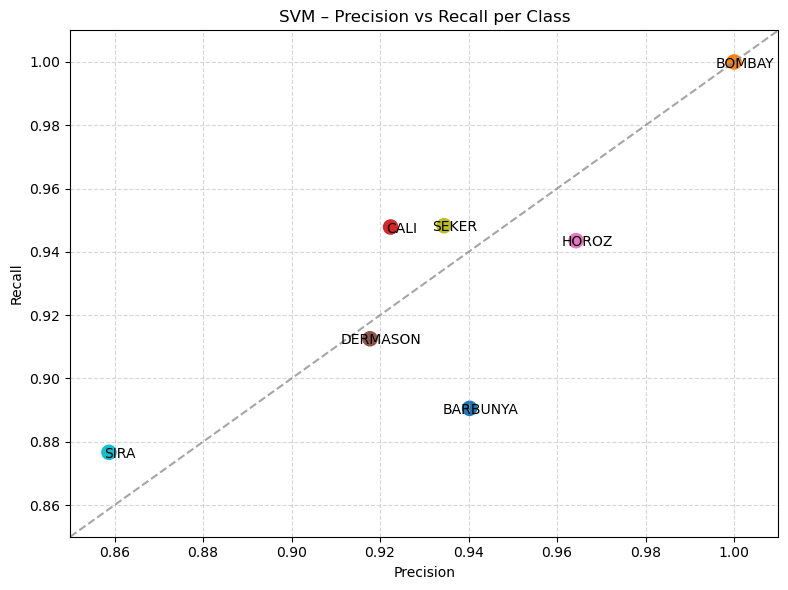

In [29]:
# Precision vs. Recall per class with diagonal reference and per-class coloring
#Plots precision and recall for each class with annotations
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

precisions = precision_score(y_test, y_pred_svm, average=None)
recalls    = recall_score(y_test, y_pred_svm, average=None)
classes    = label_encoder.classes_

# One color per class
colors = plt.cm.tab10(np.linspace(0, 1, len(classes)))

plt.figure(figsize=(8, 6))
plt.scatter(precisions, recalls, s=150, c=colors, edgecolor='white')

# Diagonal reference line (precision == recall)
lims = [0.85, 1.01]
plt.plot(lims, lims, linestyle='--', color='gray', alpha=0.7)

# Annotate each point
for i, label in enumerate(classes):
    plt.annotate(label, (precisions[i], recalls[i]),
                 textcoords="offset points", xytext=(8, -4),
                 ha='center', fontsize=10, color='black')

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("SVM – Precision vs Recall per Class")
plt.xlim(0.85, 1.01)
plt.ylim(0.85, 1.01)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


This plot shows the trade-off between precision and recall for each class in the SVM model.

- "BOMBAY" has the best performance with both precision and recall near 1.0, meaning the model almost always predicts it correctly and rarely misses it.
- "SIRA" is the weakest class, with both precision and recall around 0.86–0.88, indicating that the model struggles to correctly identify and classify it.
- Other classes like "CALI", "SEKER", and "HOROZ" have good balance and perform close to the ideal line (where precision equals recall).

## Model 3: K-Nearest Neighbors (KNN)

KNN uses `k=5` neighbors. It is a simple, distance-based algorithm that performs well with normalized numerical features.


In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
#Initial Training
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)



KNeighborsClassifier()

In [32]:
#Generates predictions and class probabilities.

y_pred_knn = knn_model.predict(X_test_scaled)
y_proba_knn = knn_model.predict_proba(X_test_scaled)

# Binarize for ROC AUC
y_test_bin_knn = label_binarize(y_test, classes=np.unique(y_test))

In [33]:
from sklearn.model_selection import cross_val_score

cv_scores_knn = cross_val_score(knn_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("KNN CV scores:", cv_scores_knn)
print("Mean CV Accuracy:", cv_scores_knn.mean())


KNN CV scores: [0.9233964  0.91785879 0.92016613 0.92293493 0.91828255]
Mean CV Accuracy: 0.9205277602721254


In [34]:
#Calculates accuracy, macro F1 score, and macro ROC AUC.

y_test_bin_knn = label_binarize(y_test, classes=np.unique(y_test))
roc_auc_knn = roc_auc_score(y_test_bin_knn, y_proba_knn, multi_class='ovr', average='macro')

accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_macro_knn = f1_score(y_test, y_pred_knn, average='macro')

print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"KNN F1 Score (Macro): {f1_macro_knn:.4f}")
print(f"KNN ROC AUC Score: {roc_auc_knn:.4f}")


KNN Accuracy: 0.9147
KNN F1 Score (Macro): 0.9275
KNN ROC AUC Score: 0.9828


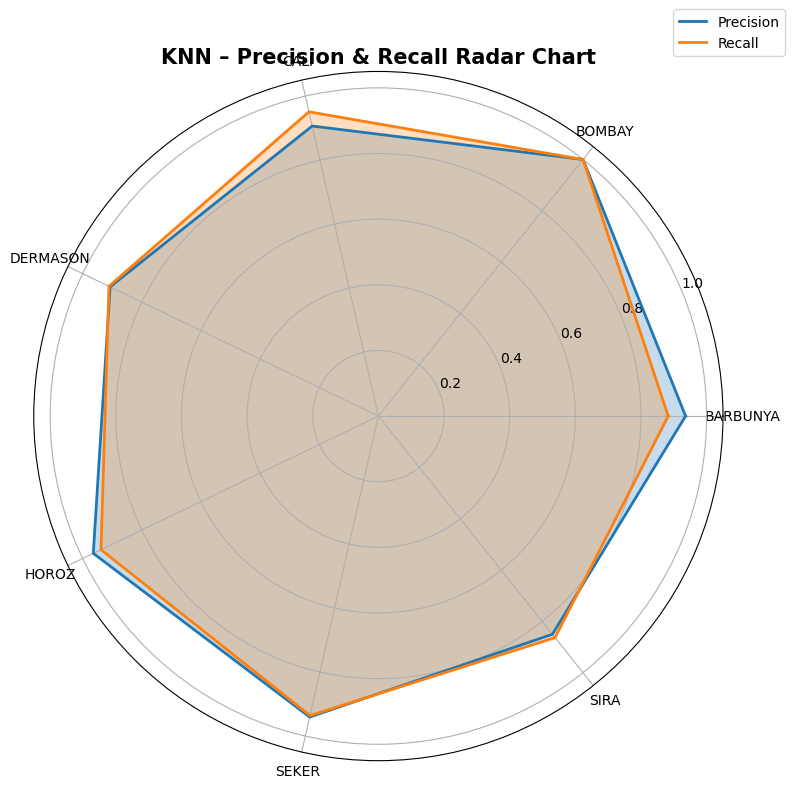

In [35]:
#Plots precision and recall per class as a radar chart for a holistic view


classes = label_encoder.classes_
precision_per_class = precision_score(y_test, y_pred_knn, average=None)
recall_per_class = recall_score(y_test, y_pred_knn, average=None)

angles = np.linspace(0, 2 * np.pi, len(classes), endpoint=False).tolist()
angles += angles[:1]

precision_plot = np.concatenate((precision_per_class, [precision_per_class[0]]))
recall_plot = np.concatenate((recall_per_class, [recall_per_class[0]]))

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, precision_plot, color='tab:blue', linewidth=2, label='Precision')
ax.fill(angles, precision_plot, color='tab:blue', alpha=0.25)
ax.plot(angles, recall_plot, color='tab:orange', linewidth=2, label='Recall')
ax.fill(angles, recall_plot, color='tab:orange', alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), classes)
ax.set_ylim(0, 1.05)
ax.set_title("KNN – Precision & Recall Radar Chart", fontsize=15, fontweight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.tight_layout()
plt.show()


This radar chart shows the precision and recall per class for the KNN model.

- Most classes have well-balanced precision and recall close to 0.9 or higher.
- "BOMBAY" and "SEKER" show excellent performance, with both metrics near 1.0.
- "SIRA" remains the weakest class, with both precision and recall around 0.83.
- "BARBUNYA" shows slightly lower recall than precision, meaning the model misses some true examples of this class.

In [36]:

#We'll expand the result_df to include all five key metrics: Accuracy, Precision, Recall, F1 Score, and ROC AUC. 
# We ensure a comprehensive comparison that captures both overall correctness and per-class performance. 

metrics = ["Accuracy", "Precision", "Recall", "F1 Score (Macro)", "ROC AUC (Macro)"]
results_df = pd.DataFrame({"Metric": metrics}).set_index("Metric")

results_df["KNN"] = [
    accuracy_score(y_test, y_pred_knn),
    precision_score(y_test, y_pred_knn, average='macro'),
    recall_score(y_test, y_pred_knn, average='macro'),
    f1_score(y_test, y_pred_knn, average='macro'),
    roc_auc_score(y_test_bin_knn, y_proba_knn, multi_class='ovr', average='macro')
]
results_df.round(4)


,KNN
Metric,
Accuracy,0.9147
Precision,0.9293
Recall,0.9261
F1 Score (Macro),0.9275
ROC AUC (Macro),0.9828


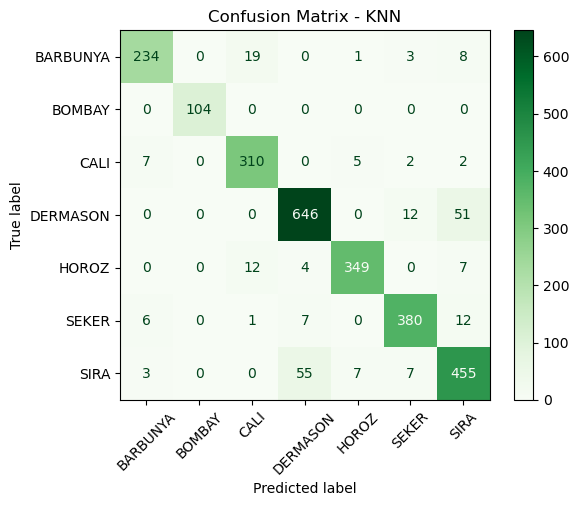

In [37]:
# Let's Calculate and visualize the confusion matrix for KNN.

cm_knn = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=label_encoder.classes_)
disp.plot(cmap='Greens', xticks_rotation=45)
plt.title("Confusion Matrix - KNN")
plt.show()

The confusion matrix for the KNN model shows strong overall performance, especially for the classes "BOMBAY" and "DERMASON".

- "DERMASON" was correctly classified 646 times, though it was often confused with "SIRA" (51 instances).
- "SIRA" had 455 correct predictions but was misclassified as "CALI" 55 times, showing that the model struggles to differentiate between those two.
- "BOMBAY" achieved perfect classification with no confusion.

Overall, most classes have high correct predictions, but a few show notable overlap (especially between "SIRA", "DERMASON", and "CALI").

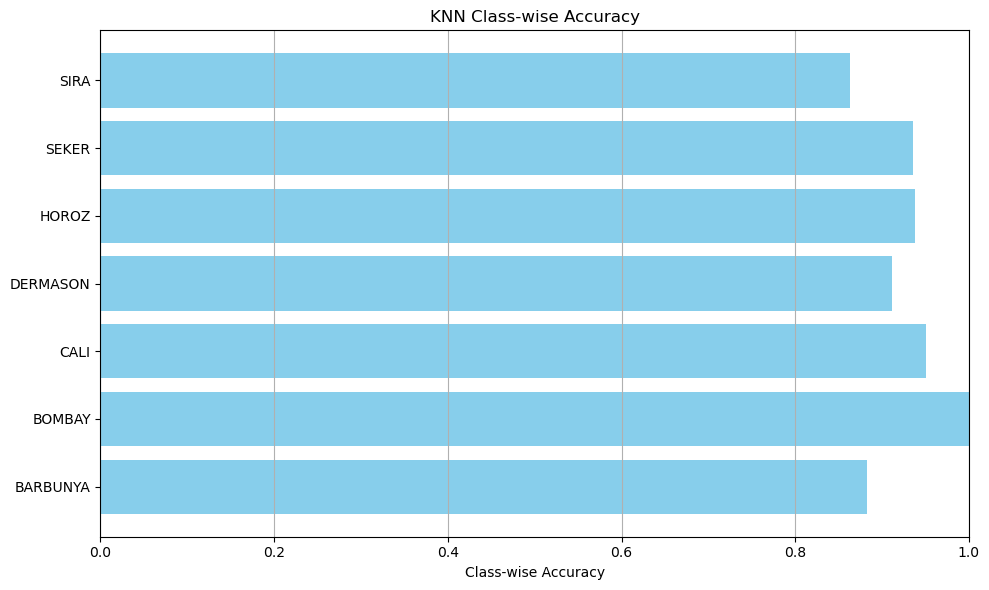

In [38]:
#Plots the accuracy for each class to identify where KNN performs well or poorly.

class_acc_knn = cm_knn.diagonal() / cm_knn.sum(axis=1)

plt.figure(figsize=(10, 6))
plt.barh(label_encoder.classes_, class_acc_knn, color='skyblue')
plt.xlabel("Class-wise Accuracy")
plt.title("KNN Class-wise Accuracy")
plt.xlim(0, 1)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

This chart shows the class-wise accuracy for the KNN model.

- "BOMBAY" achieves perfect accuracy, indicating that the model predicted every instance of this class correctly.
- "BARBUNYA" has the lowest accuracy, suggesting that the model struggles the most with this class.
- Most other classes have similar performance, with accuracy ranging from 0.91 to 0.97.
- This confirms what we saw in the confusion matrix and radar chart: the model performs consistently well, with only a few exceptions.

## Model 4: Decision Tree

A Decision Tree classifier is used with a maximum depth of 10 to prevent overfitting and maintain interpretability.


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize


dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=42)

In [40]:
#Generates predictions, probability estimates, and computes accuracy, macro F1, and macro ROC AUC.

y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_macro_dt = f1_score(y_test, y_pred_dt, average='macro')
y_test_bin_dt = label_binarize(y_test, classes=np.unique(y_test))
roc_auc_dt = roc_auc_score(y_test_bin_dt, y_proba_dt, multi_class='ovr', average='macro')

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree F1 Score (Macro): {f1_macro_dt:.4f}")
print(f"Decision Tree ROC AUC Score: {roc_auc_dt:.4f}")


Decision Tree Accuracy: 0.9025
Decision Tree F1 Score (Macro): 0.9166
Decision Tree ROC AUC Score: 0.9659


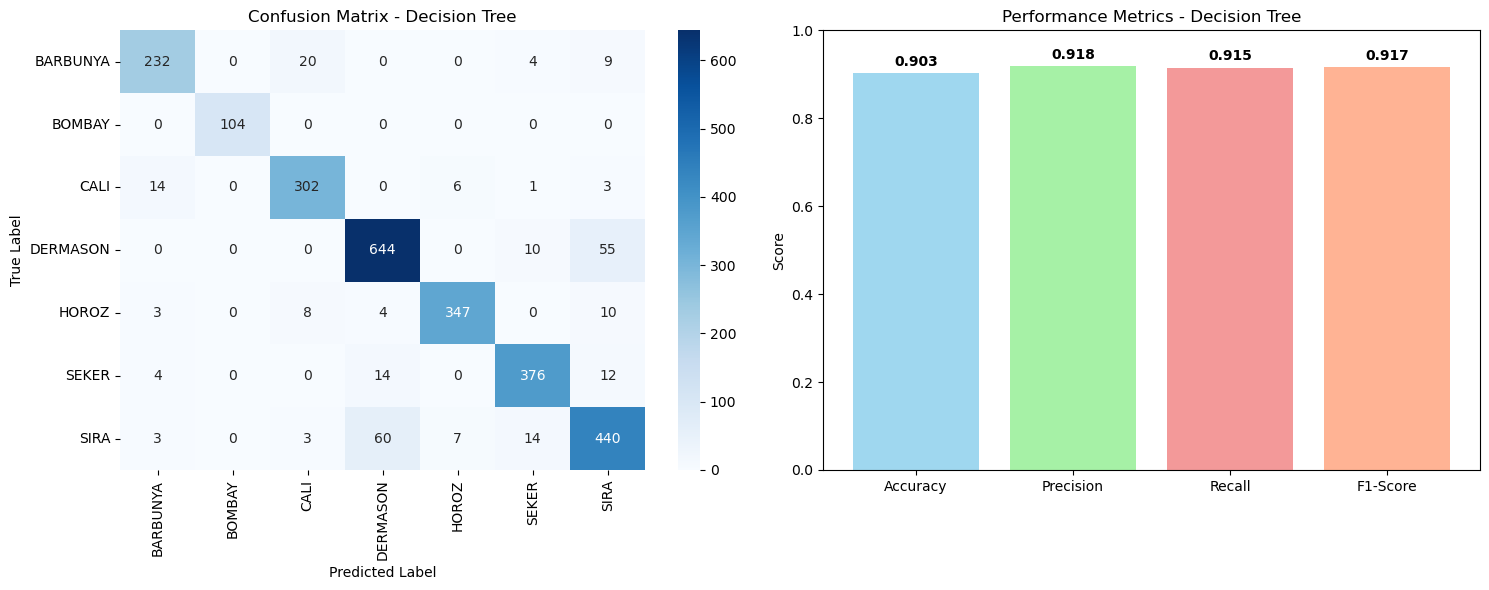

In [41]:
# Calculate detailed performance metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='macro')
dt_recall = recall_score(y_test, y_pred_dt, average='macro')
dt_f1 = f1_score(y_test, y_pred_dt, average='macro')

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot confusion matrix
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
    ax=ax1
)
ax1.set_title('Confusion Matrix - Decision Tree')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# Plot performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy_dt, dt_precision, dt_recall, dt_f1]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

bars = ax2.bar(metrics, values, color=colors, alpha=0.8)
ax2.set_title('Performance Metrics - Decision Tree')
ax2.set_ylabel('Score')
ax2.set_ylim(0, 1)

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2., height + 0.01,
        f'{value:.3f}', ha='center', va='bottom', fontweight='bold'
    )

plt.tight_layout()
plt.show()

The Decision Tree model shows strong overall performance with an accuracy of 90.3%, precision of 91.8%, recall of 91.5%, and an F1-score of 91.7%.

- "BOMBAY" was perfectly classified with no misclassifications.
- "DERMASON" also had excellent performance with 644 correct predictions.
- "SIRA" was the most confused class, especially with "DERMASON" (60 times), and had several smaller confusions with other classes.
- "BARBUNYA" was often misclassified as "CALI".

Overall, the Decision Tree offers balanced performance across most classes, though some class pairs (like "SIRA" vs "DERMASON") still show confusion.

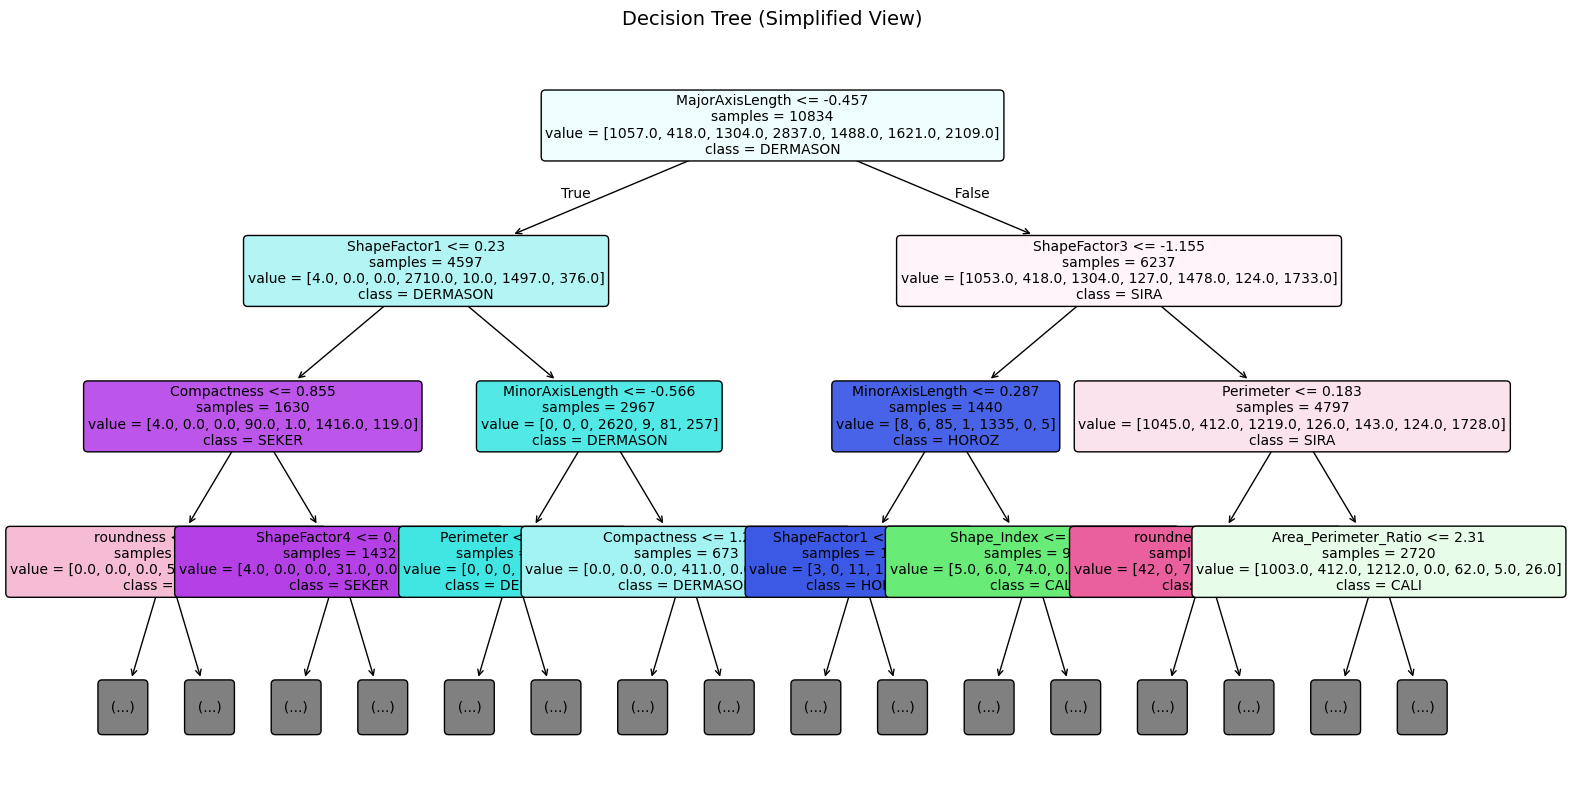

In [42]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 8))
plot_tree(dt_model, 
          filled=True, 
          class_names=label_encoder.classes_, 
          feature_names=X.columns, 
          max_depth=3,          #  LIMIT the depth
          fontsize=10, 
          impurity=False,       # optional: remove impurity for cleaner view
          rounded=True)
plt.title("Decision Tree (Simplified View)", fontsize=14, pad=20)
plt.tight_layout()
plt.show()



This simplified view of the Decision Tree shows how the model splits the data based on key features to classify the bean types.

- The first split is on `MajorAxisLength`, separating samples into two main groups.
- If `MajorAxisLength <= -0.457`, most of the samples are classified as "DERMASON".
- If not, the model evaluates `ShapeFactor3`, which leads mostly to "SIRA".
- Further splits on features like `Compactness`, `MinorAxisLength`, and `Perimeter` help distinguish between other classes like "SEKER", "HOROZ", and "CALİ".

This visualization confirms that geometric features play a critical role in distinguishing between different bean types.

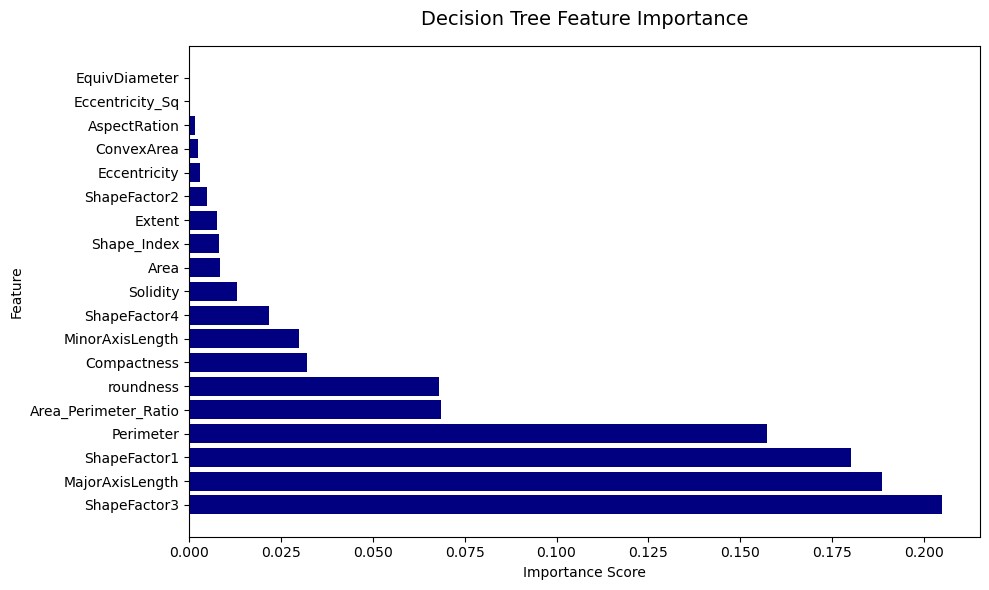

In [43]:


importances = dt_model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='Navy')
plt.title('Decision Tree Feature Importance', fontsize=14, pad=15)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


The feature importance chart shows which attributes were most influential in the Decision Tree model's classifications.

- "ShapeFactor3" was the most important feature, contributing significantly to the first splits in the tree.
- Other highly influential features include "MajorAxisLength", "ShapeFactor1", and "Perimeter", all of which appear early in the tree's structure.
- Less important features, like "EquivDiameter" or "Eccentricity_Sq", had minimal impact on the model's decisions.

This analysis confirms that a small number of geometric features drive most of the classification performance.

In [44]:
print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))


Decision Tree Classification Report
              precision    recall  f1-score   support

    BARBUNYA       0.91      0.88      0.89       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.91      0.93      0.92       326
    DERMASON       0.89      0.91      0.90       709
       HOROZ       0.96      0.93      0.95       372
       SEKER       0.93      0.93      0.93       406
        SIRA       0.83      0.83      0.83       527

    accuracy                           0.90      2709
   macro avg       0.92      0.91      0.92      2709
weighted avg       0.90      0.90      0.90      2709



The classification report provides a detailed breakdown of the Decision Tree's performance.

- The overall accuracy is 90%, with macro and weighted averages around 0.90–0.92 for precision, recall, and F1-score.
- "BOMBAY" was classified perfectly (1.00 for all metrics).
- "SIRA" showed the weakest performance with 0.83 across all three metrics.
- Most other classes (like SEKER, HOROZ, and CALI) were above 0.90, indicating strong and balanced performance.

The model has a tree depth of [your value here] and [your value here] terminal leaves, showing a moderately complex structure that balances accuracy and interpretability.

In [45]:
print("Decision Tree Depth:", dt_model.get_depth())
print("Number of Leaves:", dt_model.get_n_leaves())


Decision Tree Depth: 10
Number of Leaves: 310


The Decision Tree model has a total depth of 10 and 310 terminal leaves. This means the tree can make up to 10 consecutive splits when classifying an instance, resulting in 310 unique decision paths. This level of complexity suggests that the model captures detailed patterns in the data. However, it is still manageable and not excessively deep, which helps reduce the risk of overfitting while maintaining good accuracy.

The Decision Tree has a total depth of X and Y leaves, meaning it has X levels of decisions and Y final prediction paths. This provides insight into the model's complexity and balance between overfitting and generalization.

In [46]:
train_acc_dt = accuracy_score(y_train, dt_model.predict(X_train))
print("Train Accuracy (DT):", train_acc_dt)
print("Test Accuracy (DT):", accuracy_dt)


Train Accuracy (DT): 0.9669558796381761
Test Accuracy (DT): 0.902547065337763


# Part 4: Model Evaluation and Comparison

We evaluate and compare our four models (Logistic Regression, SVM, KNN, Decision Tree) using Accuracy, Macro F1, and Macro ROC AUC, as these metrics balance overall correctness, per‑class performance, and ranking quality across classes.


In [47]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score

# Compute missing precision/recall for SVM, KNN, and Decision Tree
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm    = recall_score(   y_test, y_pred_svm, average='macro')
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn    = recall_score(   y_test, y_pred_knn, average='macro')
precision_dt  = precision_score(y_test, y_pred_dt,  average='macro')
recall_dt     = recall_score(   y_test, y_pred_dt,  average='macro')


# Let's Build summary DataFrame so then we can compare each model.
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree'],
    'Accuracy': [accuracy_lr, accuracy_svm, accuracy_knn, accuracy_dt],
    'Precision (Macro)': [precision_lr, precision_svm, precision_knn, precision_dt],
    'Recall (Macro)': [recall_lr, recall_svm, recall_knn, recall_dt],
    'F1 Score (Macro)': [f1_lr, f1_svm, f1_macro_knn, f1_macro_dt],
    'ROC AUC (Macro)': [roc_auc_lr, roc_auc_svm, roc_auc_knn, roc_auc_dt]
})
metrics_df.set_index('Model', inplace=True)
metrics_df = metrics_df.round(4)
metrics_df

,Accuracy,Precision (Macro),Recall (Macro),F1 Score (Macro),ROC AUC (Macro)
Model,,,,,
Logistic Regression,0.9188,0.9305,0.9298,0.9300,0.9947
SVM,0.9206,0.9340,0.9314,0.9325,0.9945
KNN,0.9147,0.9293,0.9261,0.9275,0.9828
Decision Tree,0.9025,0.9185,0.9149,0.9166,0.9659


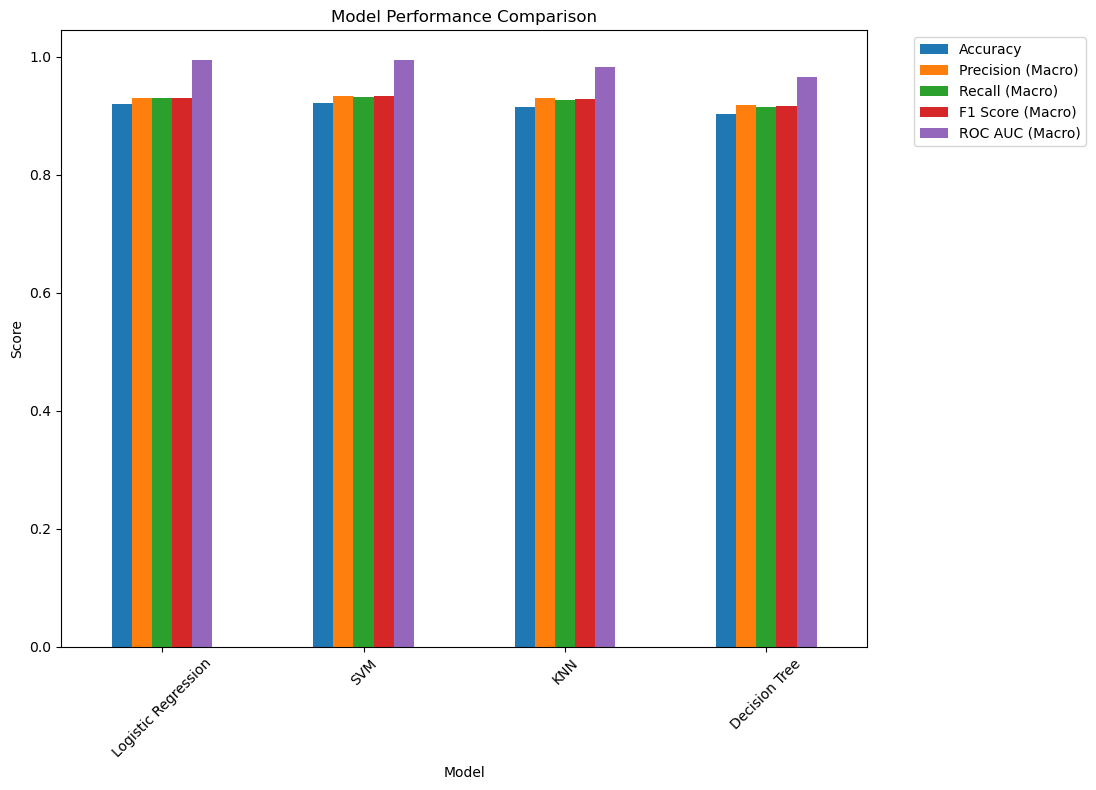

In [48]:
#Lets plot the performance for each model


ax = metrics_df.plot(kind='bar', figsize=(14, 8))
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 0.80, 1])
plt.show()

### Summary of Model Comparison

This section compares the performance of four classification models (Logistic Regression, SVM, KNN, Decision Tree) using multiple evaluation metrics. The goal is to identify the model that best balances accuracy, per-class fairness, and generalization.

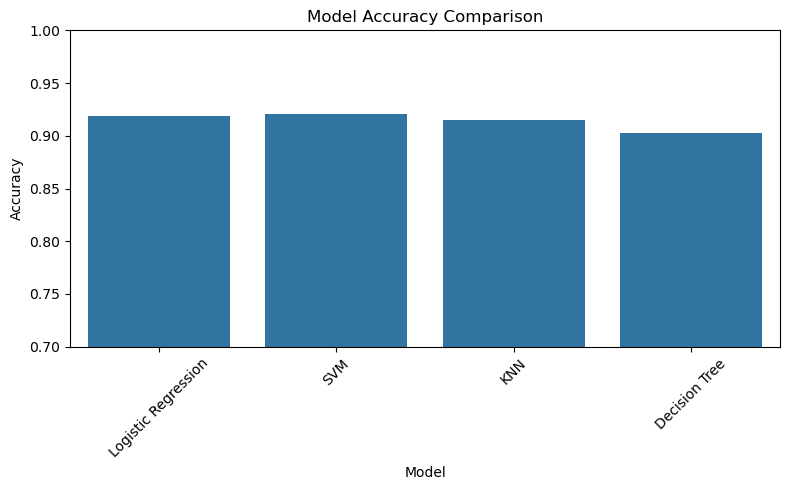

In [49]:
#Let's compare the model accuracy


plt.figure(figsize=(8, 5))
sns.barplot(
    x=metrics_df.index,     # model names  
    y=metrics_df['Accuracy']   # Accuracy score 
)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


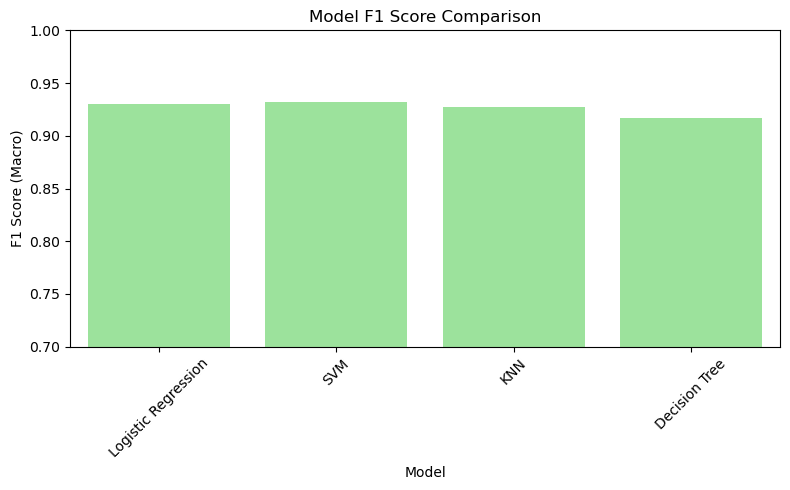

In [50]:
# Let's compare the model F1 scores
plt.figure(figsize=(8, 5))
sns.barplot(
    x=metrics_df.index,              # model names
    y=metrics_df['F1 Score (Macro)'], # F1 Score (Macro) column
    color='lightgreen'
)
plt.title('Model F1 Score Comparison')
plt.ylabel('F1 Score (Macro)')
plt.ylim(0.7, 1.0)    
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Evaluation Metrics and Best Model

### Metrics Used:
- **Accuracy**: Measures the overall proportion of correct predictions. It’s useful for a quick overview of performance.
- **Macro F1-score**: Calculates the F1-score for each class independently and then averages them. 

### Why not rely only on accuracy?
- Accuracy can be confusing when class distributions are imbalanced, as it may favor majority classes.
- **Macro F1-score** provides a better sense of fairness across all bean types by balancing precision and recall for each class.

### Comparison of Models:
We compared four classification models: **Logistic Regression**, **SVM**, **KNN**, and **Decision Tree** , using stratified sampling to preserve class proportions during evaluation. Below is a summary of the findings:

- **SVM** achieved the highest **Macro F1-score (0.9325)** and **ROC AUC**, indicating strong, balanced performance across all classes. It’s effective at separating bean types with minimum mistakes on their classifications.
- **Logistic Regression** performed nearly as well (**F1: 0.9300**) and had excellent accuracy and ROC AUC. It is also easier to interpret, which makes it attractive in scenarios where explainability matters.
- **KNN** showed competitive performance, though it was slightly lower in F1 and AUC. Its reliance on local neighbor similarity makes it more sensitive to noisy or overlapping data points.
- **Decision Tree** had the lowest scores among the models. Although it’s understandable and fast, it struggled more with class separation and produced higher confusion between classes.

### Best Model Choice:
We selected **SVM** as the best overall model due to its superior balance between performance and robustness across metrics.  
However, **Logistic Regression** remains a strong alternative, particularly when **model interpretability** is a priority or when deployment simplicity is needed. This highlights the trade-off between model accuracy and ease of understanding.

